# Numerical experiments for application of Markov Chain Monte Carlo to establishment of calibration intervals

written by Hyung Seok, Shim & Seung Nam, Park (Korea Research Institute Standards and Science), 6 Sep 2021

updated by Hyung Seok, Shim, 12 Jan 2022

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Foreword" data-toc-modified-id="Foreword-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Foreword</a></span></li><li><span><a href="#Reliabilty-Models" data-toc-modified-id="Reliabilty-Models-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reliabilty Models</a></span><ul class="toc-item"><li><span><a href="#Weibull-model" data-toc-modified-id="Weibull-model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Weibull model</a></span></li><li><span><a href="#Lognormal-model" data-toc-modified-id="Lognormal-model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Lognormal model</a></span></li></ul></li><li><span><a href="#Simulation-of-calibration-records" data-toc-modified-id="Simulation-of-calibration-records-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Simulation of calibration records</a></span><ul class="toc-item"><li><span><a href="#Import-module-and-functions" data-toc-modified-id="Import-module-and-functions-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Import module and functions</a></span></li><li><span><a href="#Set-calibration-conditions-for-the-simuation-of-calibration-records" data-toc-modified-id="Set-calibration-conditions-for-the-simuation-of-calibration-records-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Set calibration conditions for the simuation of calibration records</a></span></li><li><span><a href="#Generation-of-calibration-records-for-all-conditions-in-3.2" data-toc-modified-id="Generation-of-calibration-records-for-all-conditions-in-3.2-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Generation of calibration records for all conditions in 3.2</a></span></li><li><span><a href="#Graphical-representation-of-simulated-calibration-records" data-toc-modified-id="Graphical-representation-of-simulated-calibration-records-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Graphical representation of simulated calibration records</a></span><ul class="toc-item"><li><span><a href="#condition-4-&amp;-subcondition-2" data-toc-modified-id="condition-4-&amp;-subcondition-2-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>condition 4 &amp; subcondition 2</a></span></li><li><span><a href="#condition-11-&amp;-subcondition-2" data-toc-modified-id="condition-11-&amp;-subcondition-2-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>condition 11 &amp; subcondition 2</a></span></li></ul></li></ul></li><li><span><a href="#Estimation-for-measurement-reliability-model-and-Calibration-interval" data-toc-modified-id="Estimation-for-measurement-reliability-model-and-Calibration-interval-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Estimation for measurement reliability model and Calibration interval</a></span><ul class="toc-item"><li><span><a href="#Import-module-and-functions" data-toc-modified-id="Import-module-and-functions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Import module and functions</a></span></li><li><span><a href="#Estimation-of-model-parameter-using-calibration-records" data-toc-modified-id="Estimation-of-model-parameter-using-calibration-records-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Estimation of model parameter using calibration records</a></span></li><li><span><a href="#Uncertainty-estimation-for-parameter-estimate" data-toc-modified-id="Uncertainty-estimation-for-parameter-estimate-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Uncertainty estimation for parameter estimate</a></span></li><li><span><a href="#Estimation-of-optimal-calibration-interval-based-on-measurement-reliability-model" data-toc-modified-id="Estimation-of-optimal-calibration-interval-based-on-measurement-reliability-model-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Estimation of optimal calibration interval based on measurement reliability model</a></span></li><li><span><a href="#Uncertainty-estimation-for-calibration-interval" data-toc-modified-id="Uncertainty-estimation-for-calibration-interval-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Uncertainty estimation for calibration interval</a></span></li></ul></li><li><span><a href="#Joint-distribution-and-correlation-of-parameter-estimates" data-toc-modified-id="Joint-distribution-and-correlation-of-parameter-estimates-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Joint distribution and correlation of parameter estimates</a></span><ul class="toc-item"><li><span><a href="#Import-module-and-functions" data-toc-modified-id="Import-module-and-functions-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Import module and functions</a></span></li><li><span><a href="#Plotting-joint-distribution-and-calculation-of-correlation-coefficient" data-toc-modified-id="Plotting-joint-distribution-and-calculation-of-correlation-coefficient-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Plotting joint distribution and calculation of correlation coefficient</a></span></li></ul></li></ul></div>

## Foreword

This notebook is supplementary materials of the paper **"Numerical experiments for application of Markov Chain Monte Carlo to establishment of calibration intervals (in press, IEEE TIM)"**. All of results described in the paper are shown in this notebook. Additionally, 
other results on various calibration records, which are not shown in the paper, can be shown by adjust some input variables in functions.

## Reliabilty Models

Two reliability models are used in this study. The expressions of the reliability model were different between  NCSLI document and the Pymc3 document. Therefore, to avoid confusion, the two expressions for each reliability model are shown as follows:

### Weibull model

$$ 
\begin{align}
&R(t) = e^{-(\theta_1 t)^ {\theta_2}}&&(\text{NCSLI RP-1 expression})\\ 
\\
&R(t) = e^{-(\frac{t}{\beta})^ {\alpha}}&&(\text{Pymc3 expression})\\ 
\\
&(\theta_1, \theta_2) \:\: \text{is equivalent to} \ (\beta^{-1}, \alpha) \:\: \text{in Pymc3.}\\
\end{align} 
$$  


  
### Lognormal model

$$ 
\begin{align}
&R(t)=1-\Phi\left[\frac{\ln(\theta_{1}t)}{\theta_{2}}\right] &&(\text{NCSLI RP-1 expression})\\
\\
&R(t)=1-\Phi\left[\frac{\ln(t)-\mu}{\sigma}\right] &&(\text{Pymc3 expression})\\
\\
&where,\quad\Phi(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^x e^ {{-\xi^2}/2} d\xi\\
\\
&(\theta_1, \theta_2) \:\: \text{is equivalent to} \ (e^{-\mu}, \sigma) \:\: \text{in Pymc3.}\\
\end{align} 
$$

## Simulation of calibration records

All the numerical experiments in this study were conducted using simulated calibration records. The simulated calibration records were used to test the validity of the MCMC and S3 methods. Simulated calibration records were used instead of actual calibration records so that the validity of the two methods could be tested under various calibration conditions.

### Import module and functions

In [1]:
from data_gen import generate_all_calibration_history, rnd_weibu, rnd_lognorm, plt_oot
from rel_mod import mod_weibu, mod_lognorm

### Set calibration conditions for the simuation of calibration records

In [2]:
cdt = {0:     #conditions for the simulation of calibration records
       {'model': 'Weibull', 
        'rnd_ftn': rnd_weibu, 'rel_ftn': mod_weibu, 
        'theta':[30.5, 1.27], 'inits': [28.0, 2.0], 
        'mte_n': 200, 'cal_n': 10, 
        'itv_l':[6,12,18,24], 'itv_h':[6,12,18,24],
        '2itvs': False, 'policy': 'RF', 
        'labels': ['6 RF','12 RF','18 RF','24 RF']},
       1: 
       {'model': 'Weibull', 
        'rnd_ftn': rnd_weibu, 'rel_ftn': mod_weibu, 
        'theta':[30.5, 1.27], 'inits': [28.0, 2.0], 
        'mte_n': 200, 'cal_n': 10, 
        'itv_l':[6,12,18,24], 'itv_h':[6,12,18,24],
        '2itvs': False, 'policy': 'RA', 
        'labels': ['6 RA','12 RA','18 RA','24 RA']},
       2: 
       {'model': 'Weibull', 
        'rnd_ftn': rnd_weibu, 'rel_ftn': mod_weibu, 
        'theta':[30.5, 1.27], 'inits': [28.0, 2.0], 
        'mte_n': 200, 'cal_n': 10, 
        'itv_l':[6,6,6,12], 'itv_h':[12,18,24, 24],
        '2itvs': True, 'policy': 'RF', 
        'labels': ['6,12 RF','6,18 RF','6,24 RF','12,24 RF']},
       3: 
       {'model': 'Weibull', 
        'rnd_ftn': rnd_weibu, 'rel_ftn': mod_weibu, 
        'theta':[30.5, 1.27], 'inits': [28.0, 2.0], 
        'mte_n': 200, 'cal_n': 10, 
        'itv_l':[6,6,6,12], 'itv_h':[12,18,24, 24],
        '2itvs': True, 'policy': 'RA', 
        'labels': ['6,12 RA','6,18 RA','6,24 RA','12,24 RA']},
       4:
       {'model': 'Weibull', 
        'rnd_ftn': rnd_weibu, 'rel_ftn': mod_weibu, 
        'theta':[30.5, 1.27], 'inits': [28.0, 2.0], 
        'mte_n': 200, 'cal_n': 10, 
        'itv_l':[6,6,6,12], 'itv_h':[12,18,24,24],
        '2itvs': False, 'policy': 'RF', 
        'labels': ['6-12 RF','6-18 RF','6-24 RF','12-24 RF']},
       5: 
       {'model': 'Weibull', 'rnd_ftn': rnd_weibu, 'rel_ftn': mod_weibu, 
        'theta':[30.5, 1.27], 'inits': [28.0, 2.0], 
        'mte_n': 200, 'cal_n': 10, 
        'itv_l':[6,6,6,12], 'itv_h':[12,18,24,24],
        '2itvs': False, 'policy': 'RA', 
        'labels': ['6-12 RA','6-18 RA','6-24 RA','12-24 RA']},
       6:
       {'model': 'Lognormal', 
        'rnd_ftn': rnd_lognorm, 'rel_ftn': mod_lognorm, 
        'theta':[3.5, 1.0], 'inits': [2.0, 2.1], 
        'mte_n': 200, 'cal_n': 10, 
        'itv_l':[6,12,18,24], 'itv_h':[6,12,18,24],
        '2itvs': False, 'policy': 'RF', 
        'labels': ['6 RF','12 RF','18 RF','24 RF']},
       7:
       {'model': 'Lognormal', 
        'rnd_ftn': rnd_lognorm, 'rel_ftn': mod_lognorm, 
        'theta':[3.5, 1.0], 'inits': [2.0, 2.1], 
        'mte_n': 200, 'cal_n': 10, 
        'itv_l':[6,12,18,24], 'itv_h':[6,12,18,24],
        '2itvs': False, 'policy': 'RA', 
        'labels': ['6 RA','12 RA','18 RA','24 RA']},
       8:
       {'model': 'Lognormal', 
        'rnd_ftn': rnd_lognorm, 'rel_ftn': mod_lognorm, 
        'theta':[3.5, 1.0], 'inits': [2.0, 2.1], 
        'mte_n': 200, 'cal_n': 10, 
        'itv_l':[6,6,6,12], 'itv_h':[12,18,24,24],
        '2itvs': True, 'policy': 'RF', 
        'labels': ['6,12 RF','6,18 RF','6,24 RF','12,24 RF']},
       9:
       {'model': 'Lognormal', 
        'rnd_ftn': rnd_lognorm, 'rel_ftn': mod_lognorm, 
        'theta':[3.5, 1.0], 'inits': [2.0, 2.1], 
        'mte_n': 200, 'cal_n': 10, 
        'itv_l':[6,6,6,12], 'itv_h':[12,18,24,24],
        '2itvs': True, 'policy': 'RA', 
        'labels': ['6,12 RA','6,18 RA','6,24 RA','12,24 RA']},
       10:
       {'model': 'Lognormal', 
        'rnd_ftn': rnd_lognorm, 'rel_ftn': mod_lognorm, 
        'theta':[3.5, 1.0], 'inits': [2.0, 2.1], 
        'mte_n': 200, 'cal_n': 10, 
        'itv_l':[6,6,6,12], 'itv_h':[12,18,24,24],
        '2itvs': False, 'policy': 'RF', 
        'labels': ['6-12 RF','6-18 RF','6-24 RF','12-24 RF']},
       11:
       {'model': 'Lognormal', 
        'rnd_ftn': rnd_lognorm, 'rel_ftn': mod_lognorm, 
        'theta':[3.5, 1.0], 'inits': [2.0, 2.1], 
        'mte_n': 200, 'cal_n': 10, 
        'itv_l':[6,6,6,12], 'itv_h':[12,18,24,24],
        '2itvs': False, 'policy': 'RA', 
        'labels': ['6-12 RA','6-18 RA','6-24 RA','12-24 RA']},
      }

A list of conditions
- condition j=0 : Weibull model, Renewal if Failed policy, single interval of 6,12,18,24
- condition j=1 : Weibull model, Renewal Always policy, single interval of 6,12,18,24
- condition j=2 : Weibull model, Renewal if Failed policy, randomly chosen interval of (6 or 12),(6 or 18), (6 or 24), (12 or 24)
- condition j=3 : Weibull model, Renewal Always policy, randomly chosen interval of (6 or 12),(6 or 18), (6 or 24), (12 or 24)
- condition j=4 : Weibull model, Renewal if Failed policy, random calibration interval between 6\~12, 6\~18, 6\~24, 12\~24
- condition j=6 : Weibull model, Renewal Always policy, random calibration interval between 6\~12, 6\~18, 6\~24, 12\~24
- condition j=7 : Lognormal model, Renewal if Failed policy, single interval of 6,12,18,24
- condition j=8 : Lognormal model, Renewal Always policy, single interval of 6,12,18,24
- condition j=9 : Lognormal model, Renewal if Failed policy, randomly chosen interval of (6 or 12),(6 or 18), (6 or 24), (12 or 24)
- condition j=10 : Lognormal model, Renewal Always policy, randomly chosen interval of (6 or 12),(6 or 18), (6 or 24), (12 or 24)
- condition j=11 : Lognormal model, Renewal if Failed policy, random calibration interval between 6\~12, 6\~18, 6\~24, 12\~24
- condition j=12 : Lognormal model, Renewal Always policy, random calibration interval between 6\~12, 6\~18, 6\~24, 12\~24

### Generation of calibration records for all conditions in 3.2

In [3]:
res = generate_all_calibration_history(cdt)
res

{0: {'ty': [[array([[ 0,  6, 12, ..., 48, 54, 60],
           [ 0,  6, 12, ..., 48, 54, 60],
           [ 0,  6, 12, ..., 48, 54, 60],
           ...,
           [ 0,  6, 12, ..., 48, 54, 60],
           [ 0,  6, 12, ..., 48, 54, 60],
           [ 0,  6, 12, ..., 48, 54, 60]]),
    array([[0, 0, 0, ..., 0, 0, 0],
           [0, 0, 0, ..., 0, 0, 0],
           [0, 0, 1, ..., 0, 0, 0],
           ...,
           [0, 0, 0, ..., 0, 0, 0],
           [0, 0, 0, ..., 0, 0, 0],
           [0, 0, 0, ..., 0, 1, 0]])],
   [array([[  0,  12,  24, ...,  96, 108, 120],
           [  0,  12,  24, ...,  96, 108, 120],
           [  0,  12,  24, ...,  96, 108, 120],
           ...,
           [  0,  12,  24, ...,  96, 108, 120],
           [  0,  12,  24, ...,  96, 108, 120],
           [  0,  12,  24, ...,  96, 108, 120]]),
    array([[0, 0, 1, ..., 0, 0, 1],
           [0, 1, 0, ..., 0, 1, 1],
           [0, 0, 1, ..., 1, 0, 0],
           ...,
           [0, 1, 0, ..., 0, 1, 0],
           [0, 0, 1,

### Graphical representation of simulated calibration records

As an example, calibration record simulated under two conditions are shown.  

#### condition 4 & subcondition 2 
- Weibull model, Renewal if Failed policy, random calibration interval between 6~24

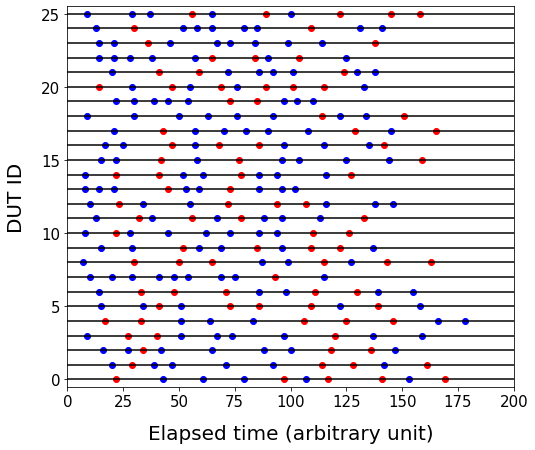

In [4]:
%matplotlib inline
plt_oot(res,j=4,k=2,start=0,end=25,xlim=200)

#### condition 11 & subcondition 2 
- lognormal model, Renewal Always policy, random calibration interval between 6~24

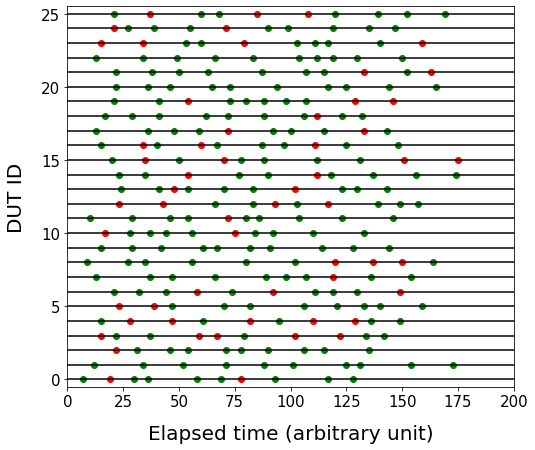

In [5]:
plt_oot(res,j=11,k=2,start=0,end=25,xlim=200)

## Estimation for measurement reliability model and Calibration interval
* Paramaters of measurment reliability model were esimated from calibration records which were simulated in Chap.3.
* NCSLI S3 method and MCMC method were applied to estimate parameters of model(Weibull or Lognormal)
* Since we had already pre-set parameters and simulated calibration records, parameters estimated by S3 and MCMC method are expected to be close to them.

### Import module and functions

In [6]:
from param_estimation import calculate_and_plot, show_estimation_result
from distribution import dist_param, dist_rel
from calibration_interval import show_interval_result, plot_interval_mcmc, plot4_interval_mcmc

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Estimation of model parameter using calibration records 
The parameters of the measurement reliability models are estimated using the S3 and the MCMC methods.  
By entering the condition number j in **'calculated_and_plot'** function, parameter estimated by S3 and MCMC method can be obtained for the calibration records simulated under the condition j. All conditions is listed in 3.1.  

As an example parameter estimation is performed using calibration records simulated under condition(j) 0.

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 3 jobs)
NUTS: [beta, alpha]


Sampling 2 chains for 1_500 tune and 5_000 draw iterations (3_000 + 10_000 draws total) took 28 seconds.


sub-condition 1
  Method       beta     alpha
0     S3  32.079272  1.162637
1   MCMC  32.236000  1.163000


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 3 jobs)
NUTS: [beta, alpha]


Sampling 2 chains for 1_500 tune and 5_000 draw iterations (3_000 + 10_000 draws total) took 29 seconds.


sub-condition 2
  Method       beta     alpha
0     S3  29.329021  1.178379
1   MCMC  29.396000  1.179000


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 3 jobs)
NUTS: [beta, alpha]


Sampling 2 chains for 1_500 tune and 5_000 draw iterations (3_000 + 10_000 draws total) took 31 seconds.


sub-condition 3
  Method       beta     alpha
0     S3  30.594877  1.280508
1   MCMC  30.641000  1.281000


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 3 jobs)
NUTS: [beta, alpha]


Sampling 2 chains for 1_500 tune and 5_000 draw iterations (3_000 + 10_000 draws total) took 29 seconds.


sub-condition 4
  Method       beta     alpha
0     S3  29.595919  1.268166
1   MCMC  29.626000  1.269000


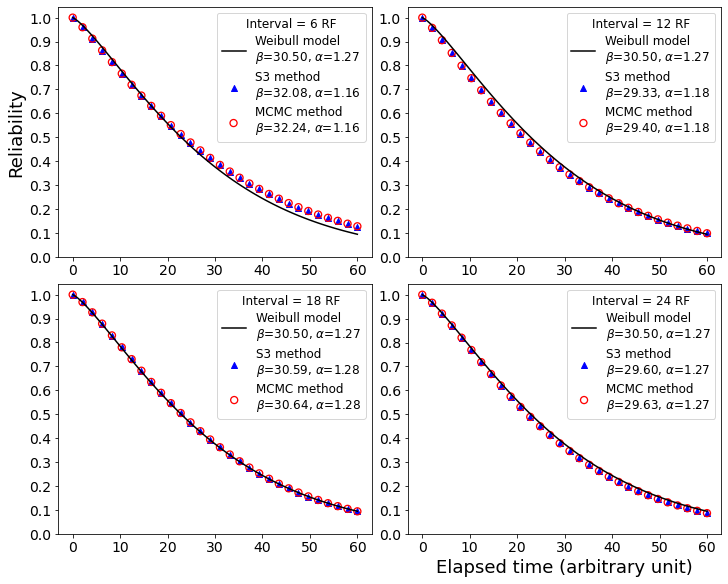

In [7]:
calculate_and_plot(cdt, res, j=0)

Results also can be shown as table using **show_estimation_result** function.  
SD means standard deviation of parameter estimates which is sampled by MCMC method. This can be used as a measure of uncertainty.   
(Caution: This function should be executed after **calculate_and_plot** function is executed.)

In [8]:
show_estimation_result(cdt,res,j=0)

,Conditions,$\beta$(True),$\beta$(S3),$\beta$(MCMC),SD($\beta$),$\alpha$(True),$\alpha$(S3),$\alpha$(MCMC),SD($\alpha$)
0,6 RF,30.50,32.08,32.24,1.55,1.27,1.16,1.16,0.06
1,12 RF,30.50,29.33,29.40,1.00,1.27,1.18,1.18,0.04
2,18 RF,30.50,30.59,30.64,0.86,1.27,1.28,1.28,0.04
3,24 RF,30.50,29.60,29.63,0.81,1.27,1.27,1.27,0.04


###  Uncertainty estimation for parameter estimate

An advantage of the MCMC method over the S3 method is the possibility to represent the uncertainty. The samples of parameters obtained by the MCMC method can provide a probability distribution for the parameter estimates, measurement reliability models,and the optimal calibration intervals.

As an example, the distributions of parameter estimates and reliablity models are shown for the condition j=0 and subcondition k=0.
From the metrological perspective on uncertainty evaluation, it can be also regarded that the distribution (uncertainty) of reliability model was propagated from the uncertainty of the parameters and the correlations between them using the functional forms of the measurement reliability models.

Condition : Weibull, 6 RF


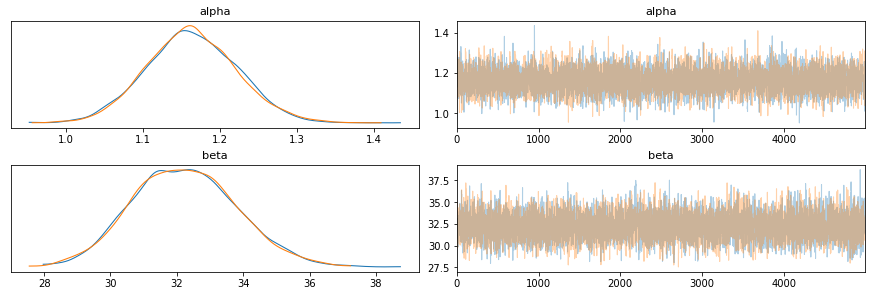

In [9]:
dist_param(cdt,res,j=0,k=0)

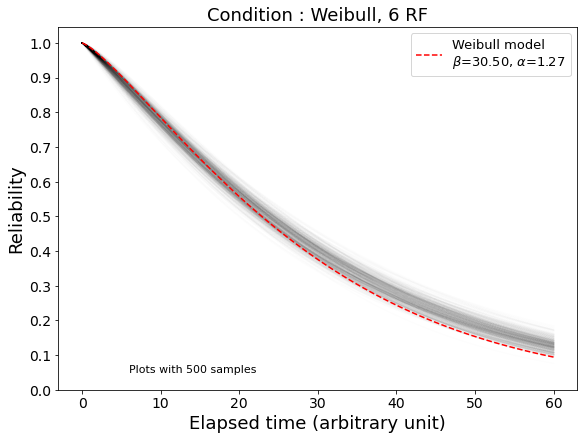

In [10]:
dist_rel(cdt,res,j=0,k=0, size=500) # size : the number of samples used to represent distribution

### Estimation of optimal calibration interval based on measurement reliability model

Calibration intervals satisfying target measurement reliability (e.g.90%) were calculated using the measurement reliability models which is estimated in 4.2 and 4.3.  
As an example, calibration intervals were calculated for the conditions of j=0.   
In the result table, **True** means interval obtained by model paramterized pre-set value in 3.2.  
'SD' means standard deviation.

In [11]:
show_interval_result(cdt, res,j=0,target_rel=0.9)

,Conditions,True,S3,MCMC,SD(MCMC)
0,6 RF,5.19,4.63,4.65,0.50
1,12 RF,5.19,4.34,4.36,0.37
2,18 RF,5.19,5.28,5.29,0.38
3,24 RF,5.19,5.02,5.03,0.39


### Uncertainty estimation for calibration interval 

As described in 4.3, uncertainty of calibration interval can be estimated by MCMC method.
**plot_interval_mcmc** function shows distribution of calibration interval calculated on calibration condition j and subcondition k.

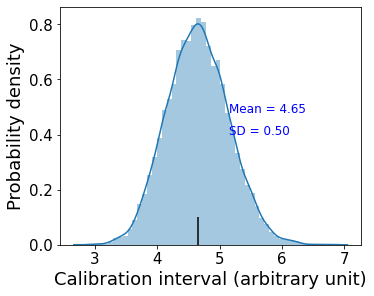

In [12]:
plot_interval_mcmc(cdt, res, j=0, k=0, target_rel=0.9)

If you want to see the distributions for all subconditions in condition j at once, use the **plot4_interval_mcmc** function.

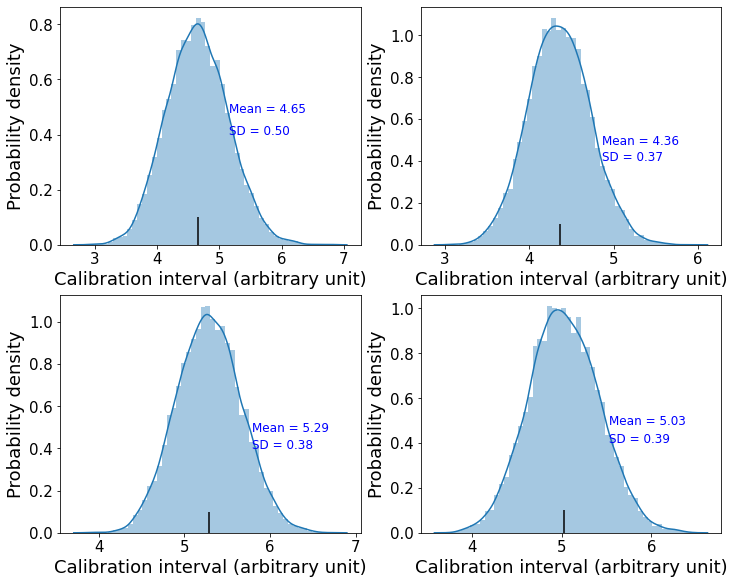

In [13]:
plot4_interval_mcmc(cdt, res, j=0, target_rel=0.9)

## Joint distribution and correlation of parameter estimates 

The MCMC method also can investigate the joint distribution of two parameters and the correlation between them because a large number of samples can be obtained. 

### Import module and functions

In [15]:
from correlation import plot_mcmc_correl, plot4_mcmc_correl

### Plotting joint distribution and calculation of correlation coefficient

**plot_MCMC_correl** function shows the joint distribution of parameters on calibration condition j and subcondition k.

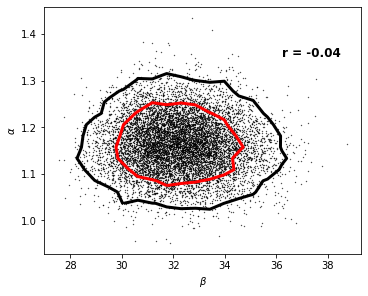

In [16]:
plot_mcmc_correl(cdt,res,j=0,k=0,scatter=True,colors=['r','k'])

If you want to see the distributions for all subconditions in condition j at once, use the **plot4_mcmc_correl** function.

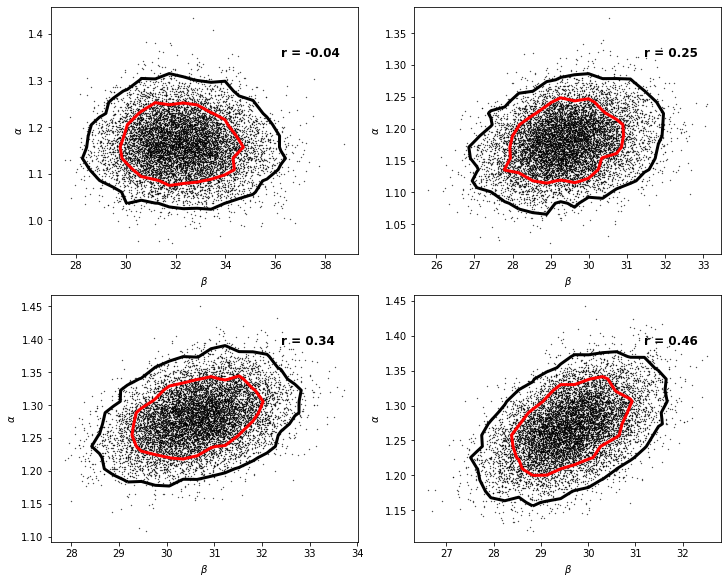

In [17]:
plot4_mcmc_correl(cdt,res,j=0,scatter=True,colors=['r','k'])